<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Natural-Language-Processing/blob/main/Anushka_505_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.4/970.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 13.1 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('wordnet')
import pandas as pd
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.stem.snowball import GermanStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk, PorterStemmer, LancasterStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


**1. Write a program to get Antonyms from WordNet.**

In [ ]:
# Word = "Good"
antonyms = []
for syn in wordnet.synsets("good"):
	for l in syn.lemmas():
		if l.antonyms():
			antonyms.append(l.antonyms()[0].name())
print(set(antonyms))

{'bad', 'evilness', 'badness', 'ill', 'evil'}


In [ ]:
# Word = "Like"
antonyms = []
for syn in wordnet.synsets("like"):
	for l in syn.lemmas():
		if l.antonyms():
			antonyms.append(l.antonyms()[0].name())
print(set(antonyms))

{'unalike', 'unlike', 'dislike'}


In [ ]:
# Word = "Beauty"
antonyms = []
for syn in wordnet.synsets("beauty"):
	for l in syn.lemmas():
		if l.antonyms():
			antonyms.append(l.antonyms()[0].name())
print(set(antonyms))

{'ugliness'}


In [ ]:
# Word = "Sweet"
antonyms = []
for syn in wordnet.synsets("sweet"):
	for l in syn.lemmas():
		if l.antonyms():
			antonyms.append(l.antonyms()[0].name())
print(set(antonyms))

{'sour', 'dry', 'salty'}


In [ ]:
# Word = "Bravery"
antonyms = []
for syn in wordnet.synsets("bravery"):
	for l in syn.lemmas():
		if l.antonyms():
			antonyms.append(l.antonyms()[0].name())
print(set(antonyms))

{'fear', 'cowardice'}


**2. Write a program for stemming non-English words.**

In [ ]:
german_st = GermanStemmer()
token_sample = ["Schreiben","geschrieben", "Gut", "Schön", "frech"]
for token in token_sample:
  lemma = german_st.stem(token)
  print(token,": ",lemma)

Schreiben :  schreib
geschrieben :  geschrieb
Gut :  gut
Schön :  schon
frech :  frech


**3. Write a program for lemmatizing words Using WordNet (Use all type of stemmers for the comparison).**

In [ ]:
text = "Gregor then turned to look out the window at the dull weather. Drops of rain could be heard hitting the pane, which made him feel quite sad. “How about if I sleep a little bit longer and forget all this nonsense”, he thought, but that was something he was unable to do because he was used to sleeping on his right, and in his present state couldn’t get into that position. However hard he threw himself onto his right, he always rolled back to where he was. He must have tried it a hundred times, shut his eyes so that he wouldn’t have to look at the floundering legs, and only stopped when he began to feel a mild, dull pain there that he had never felt before."

In [ ]:
tokens = ["good","like","beauty","sweet","bravery"]
wl=WordNetLemmatizer()
pstemmer = PorterStemmer()
lstemmer = LancasterStemmer()
lemmatized_tokens = []
pstem_word = []
lstem_word = []
for token in tokens:
  lemmatized_tokens.append(wl.lemmatize(token))
  pstem_word.append(pstemmer.stem(token))
  lstem_word.append(lstemmer.stem(token))
dict = {'Word': tokens, 'WordNetLemmatizer': lemmatized_tokens , 'PorterStemmer': pstem_word, 'LancasterStemmer' : lstem_word}
df = pd.DataFrame(dict)
df

,Word,WordNetLemmatizer,PorterStemmer,LancasterStemmer
0,good,good,good,good
1,like,like,like,lik
2,beauty,beauty,beauti,beauty
3,sweet,sweet,sweet,sweet
4,bravery,bravery,braveri,bravery


**4. Write a program to differentiate stemming and lemmatizing words.**

In [ ]:
tokens = ["good","like","beauty","sweet","bravery"]
wl=WordNetLemmatizer()
pstemmer = PorterStemmer()
lemmatized_tokens = []
pstem_word = []
for token in tokens:
  lemmatized_tokens.append(wl.lemmatize(token))
  pstem_word.append(pstemmer.stem(token))
dict = {'Word': tokens, 'Lemmatizer': lemmatized_tokens , 'Stemmer': pstem_word}
df = pd.DataFrame(dict)
df

,Word,Lemmatizer,Stemmer
0,good,good,good
1,like,like,like
2,beauty,beauty,beauti
3,sweet,sweet,sweet
4,bravery,bravery,braveri


**5. Write a program for PoS Tagging and also execute any of the tool that given in class.**

In [ ]:
# Sample sentence for POS tagging
sentence = "My name is Anushka Mazumdar. I am pursuing Masters in Artificial Intelligence and Machine Learning. I love reading"

**User-Defined**

In [ ]:
text = sentence.lower()
# Define a simple POS tagger function
def pos_tagger(sentence):
    words = sentence.split()
    tags = []
    for word in words:
        if word in ["the", "a", "an"]:
            tags.append((word, "DT"))  # Determiner
        elif word in ["my","i", "am"]:
          tags.append((word,"PRP$"))
        elif word in ["and"]:
          tags.append((word,"CC"))
        elif word in ["in"]:
          tags.append((word,"IN"))
        elif word in ["quick", "brown", "lazy"]:
            tags.append((word, "JJ"))  # Adjective
        elif word in ["artificial", "intelligence"]:
            tags.append((word, "NN"))  # Noun
        elif word in ["jumps", "over" ,"pursuing","reading","is"]:
            tags.append((word, "VB"))  # Verb
        else:
            tags.append((word, "NN"))
    return tags

# Perform POS tagging
tagged_words = pos_tagger(text)

# Display the tagged words
print(tagged_words)

[('my', 'PRP$'), ('name', 'NN'), ('is', 'VB'), ('anushka', 'NN'), ('mazumdar.', 'NN'), ('i', 'PRP$'), ('am', 'PRP$'), ('pursuing', 'VB'), ('masters', 'NN'), ('in', 'IN'), ('artificial', 'NN'), ('intelligence', 'NN'), ('and', 'CC'), ('machine', 'NN'), ('learning.', 'NN'), ('i', 'PRP$'), ('love', 'NN'), ('reading', 'VB')]


**Built-in**

In [ ]:
tokens = word_tokenize(sentence)

# Perform POS tagging
tagged_words = pos_tag(tokens)

# Display the tagged words
print(tagged_words)

[('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Anushka', 'NNP'), ('Mazumdar', 'NNP'), ('.', '.'), ('I', 'PRP'), ('am', 'VBP'), ('pursuing', 'VBG'), ('Masters', 'NNS'), ('in', 'IN'), ('Artificial', 'NNP'), ('Intelligence', 'NNP'), ('and', 'CC'), ('Machine', 'NNP'), ('Learning', 'NNP'), ('.', '.'), ('I', 'PRP'), ('love', 'VBP'), ('reading', 'VBG')]


**6. Write a program to identify the Named Entity Recognition and also execute any of the tool that given in class.**

**Built-In**

In [ ]:
ne_tags=nltk.pos_tag(tokens)
NER=ne_chunk(ne_tags)
print(NER)

(S
  My/PRP$
  name/NN
  is/VBZ
  (PERSON Anushka/NNP Mazumdar/NNP)
  ./.
  I/PRP
  am/VBP
  pursuing/VBG
  Masters/NNS
  in/IN
  (ORGANIZATION Artificial/NNP Intelligence/NNP)
  and/CC
  (PERSON Machine/NNP Learning/NNP)
  ./.
  I/PRP
  love/VBP
  reading/VBG)


**7. Implement the Dependency Parsing and Constituency Parsing using the tool.**

**Dependency Parsing**

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

for token in nlp(sentence):
 print(token.text,'=>',token.dep_,'=>',token.head.text)

My => poss => name
name => nsubj => is
is => ROOT => is
Anushka => compound => Mazumdar
Mazumdar => attr => is
. => punct => is
I => nsubj => pursuing
am => aux => pursuing
pursuing => ROOT => pursuing
Masters => dobj => pursuing
in => prep => pursuing
Artificial => compound => Intelligence
Intelligence => pobj => in
and => cc => Intelligence
Machine => compound => Learning
Learning => conj => Intelligence
. => punct => pursuing
I => nsubj => love
love => ROOT => love
reading => xcomp => love


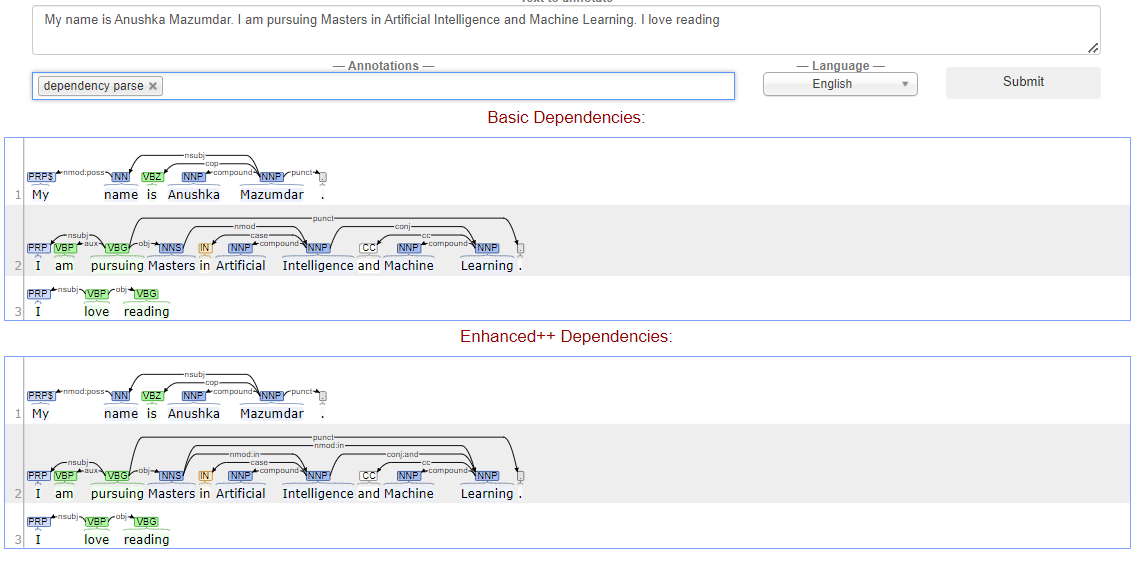

**Constituency Parsing**

In [ ]:
import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,constituency')
doc = nlp("My name is Anushka Mazumdar.I am pursuing Masters in Artificial Intelligence and Machine Learning. I love reading")
for sentence in doc.sentences:
    print(sentence.constituency)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| mwt          | combined            |
| pos          | combined_charlm     |
| constituency | ptb3-revised_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: constituency
INFO:stanza:Done loading processors!


(ROOT (S (NP (PRP$ My) (NN name)) (VP (VBZ is) (NP (NNP Anushka) (NNP Mazumdar))) (. .)))
(ROOT (S (NP (PRP I)) (VP (VBP am) (VP (VBG pursuing) (NP (NP (NNPS Masters)) (PP (IN in) (NP (NP (NNP Artificial) (NNP Intelligence)) (CC and) (NP (NNP Machine) (NNP Learning))))))) (. .)))
(ROOT (S (NP (PRP I)) (VP (VBP love) (NP (NN reading)))))


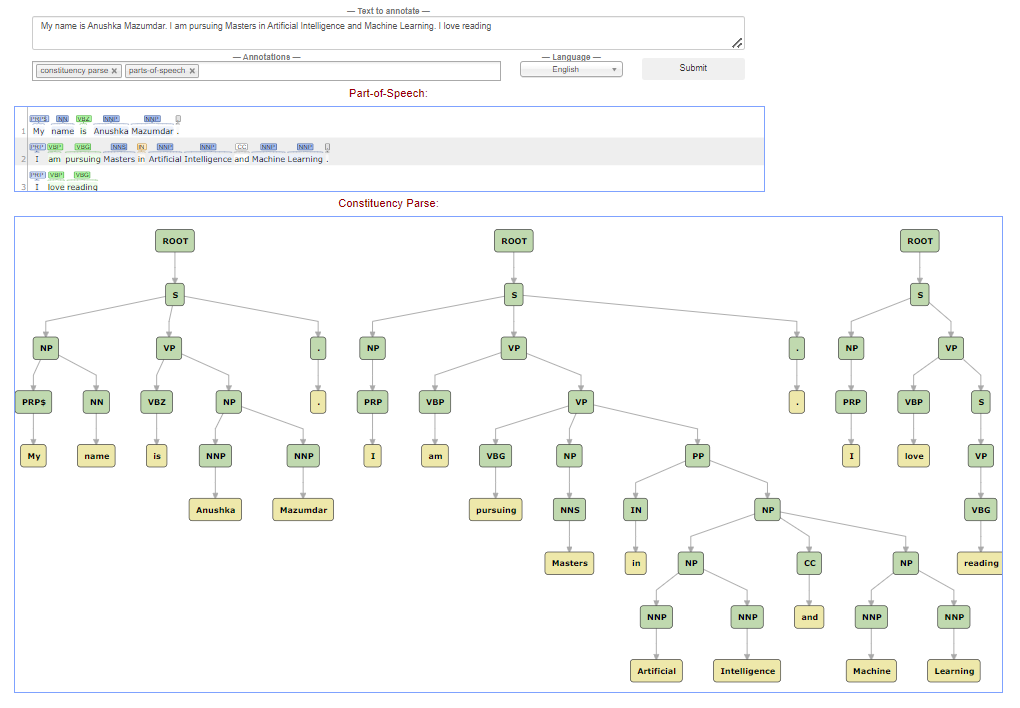